# Customer segmentation
##### This is the final project for the CSCA 5632 class, unsupervised algorithms in machine learning

##### Dataset Description:

This is a detailed dataset containing customers information about:
- Personal information
    - ID: Customer's unique identifier
    - Year_Birth: Customer's birth year
    - Education: Customer's education level
    - Marital_Status: Customer's marital status
    - Income: Customer's yearly household income
    - Kidhome: Number of children in customer's household
    - Teenhome: Number of teenagers in customer's household
    - Dt_Customer: Date of customer's enrollment with the company
    - Recency: Number of days since customer's last purchase
    - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- Products
    - MntWines: Amount spent on wine in last 2 years
    - MntFruits: Amount spent on fruits in last 2 years
    - MntMeatProducts: Amount spent on meat in last 2 years
    - MntFishProducts: Amount spent on fish in last 2 years
    - MntSweetProducts: Amount spent on sweets in last 2 years
    - MntGoldProds: Amount spent on gold in last 2 years
- Promotions
    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Place
    - NumWebPurchases: Number of purchases made through the company’s website
    - NumCatalogPurchases: Number of purchases made using a catalogue
    - NumStorePurchases: Number of purchases made directly in stores
    - NumWebVisitsMonth: Number of visits to company’s website in the last month

##### Dr. Omar Romero-Hernandez. (2021).Customer Personality Analysis . Kaggle. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

##### Problem Description:

- The task is to build a unsupervised learning algorithm to segment the customers based on their charateristics.
- Explore different algorithms and see which performs better.

- In the real life it helps business to understand in detail their clients and take actions based on their profile, treating each group of customer different to maximize their goals.

- For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


##### Pipeline
I'll follow this pipeline:
- Exploratory Data Analysis
- Preprocessing
- Modeling
- Hyperparameter tuning
- Final modeling
- Clusters found and their description
- Conclusions

# Exploratory Data Analysis
Let's explore the data.

In [148]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
data = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [150]:
data.shape

(2240, 29)

In [7]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [10]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are only a few null values in the Income feature.

In [11]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Based in this I'll create list with their data type

In [151]:
numerical_features = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Z_CostContact', 'Z_Revenue']
categorical_features = ['Education', 'Marital_Status']
boolean_features = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

#### Numerical features

In [52]:
def plot_numerical_distributions(df, cols=None):
    n = len(cols)
    rows = int(np.ceil(n / 3))
    
    plt.figure(figsize=(16, rows * 4))
    # Plot each feature distribution
    for i, col in enumerate(cols, 1):
        plt.subplot(rows, 3, i)
        plt.hist(
            df[col].dropna(), bins=15, alpha=0.7, color='salmon',
            edgecolor='black', density=True)
        plt.title(col, fontsize=30)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

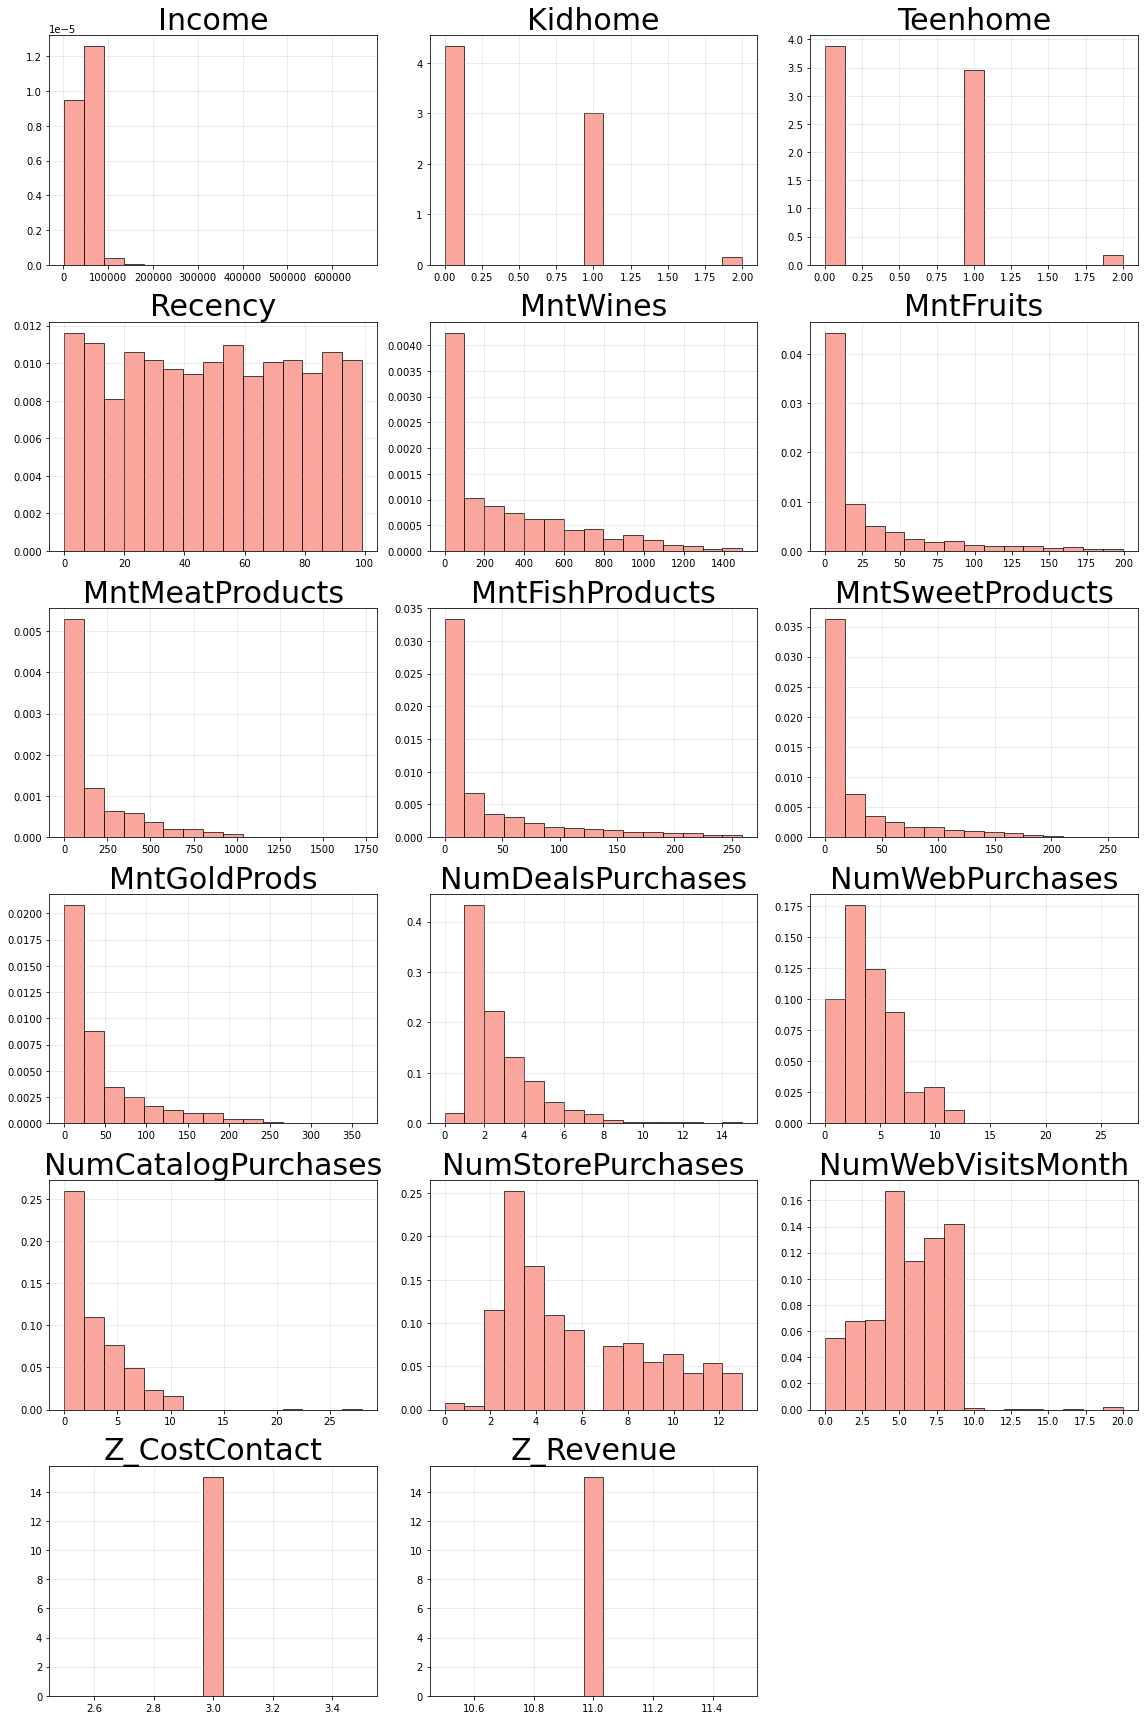

In [53]:
plot_numerical_distributions(data, numerical_features)

- The Z cost contact and z revenue don't add information as they take a single value in all the customers, so I'll remove them.
- The number of kids and teenagers features only take three values, 0, 1 and 2. Based on the plots the majority of customers don't have children, and only few of them have 2.
- It seems there might be outliers in the following features, so I'll tackle this in the preprocessing step.
    - Income
    - NumWebVisitsMonth
    - Purchases of products

In [152]:
numerical_features.remove('Z_CostContact')
numerical_features.remove('Z_Revenue')

#### Categorical features

In [76]:
def plot_categorical_distributions(df, cols=None):
    n = len(cols)
    rows = int(np.ceil(n / 3))

    plt.figure(figsize=(20, rows * 6))

    for i, col in enumerate(cols, 1):
        plt.subplot(rows, 3, i)
        counts = df[col].value_counts(dropna=False)
        colors = plt.cm.Pastel1(range(len(counts)))
        plt.bar(counts.index.astype(str), counts.values,
                edgecolor='black', alpha=0.8, color=colors)

        plt.title(col, fontsize=20)
        plt.xticks(rotation=45)
        plt.grid(True, axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()


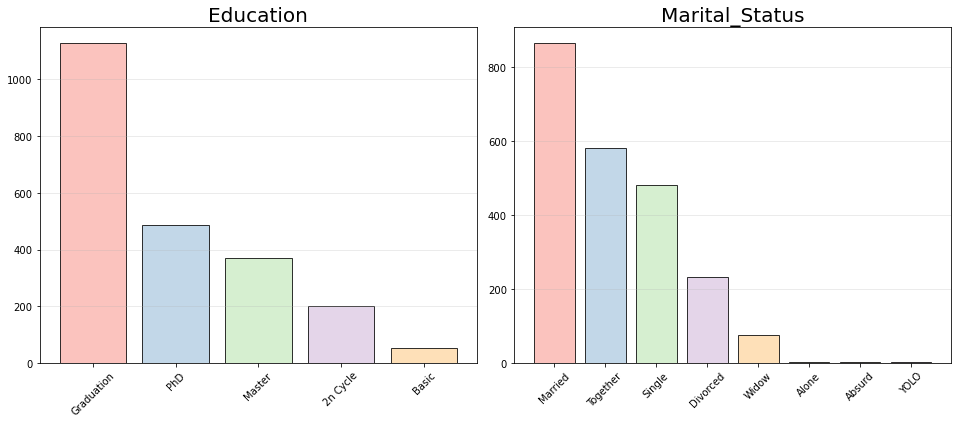

In [74]:
plot_categorical_distributions(data, cols=categorical_features)

- It suprises me that the majority of customers have higher education, even more, there are more Phd's than master degrees.
- Most of the customers are engaged.

#### Boolean features

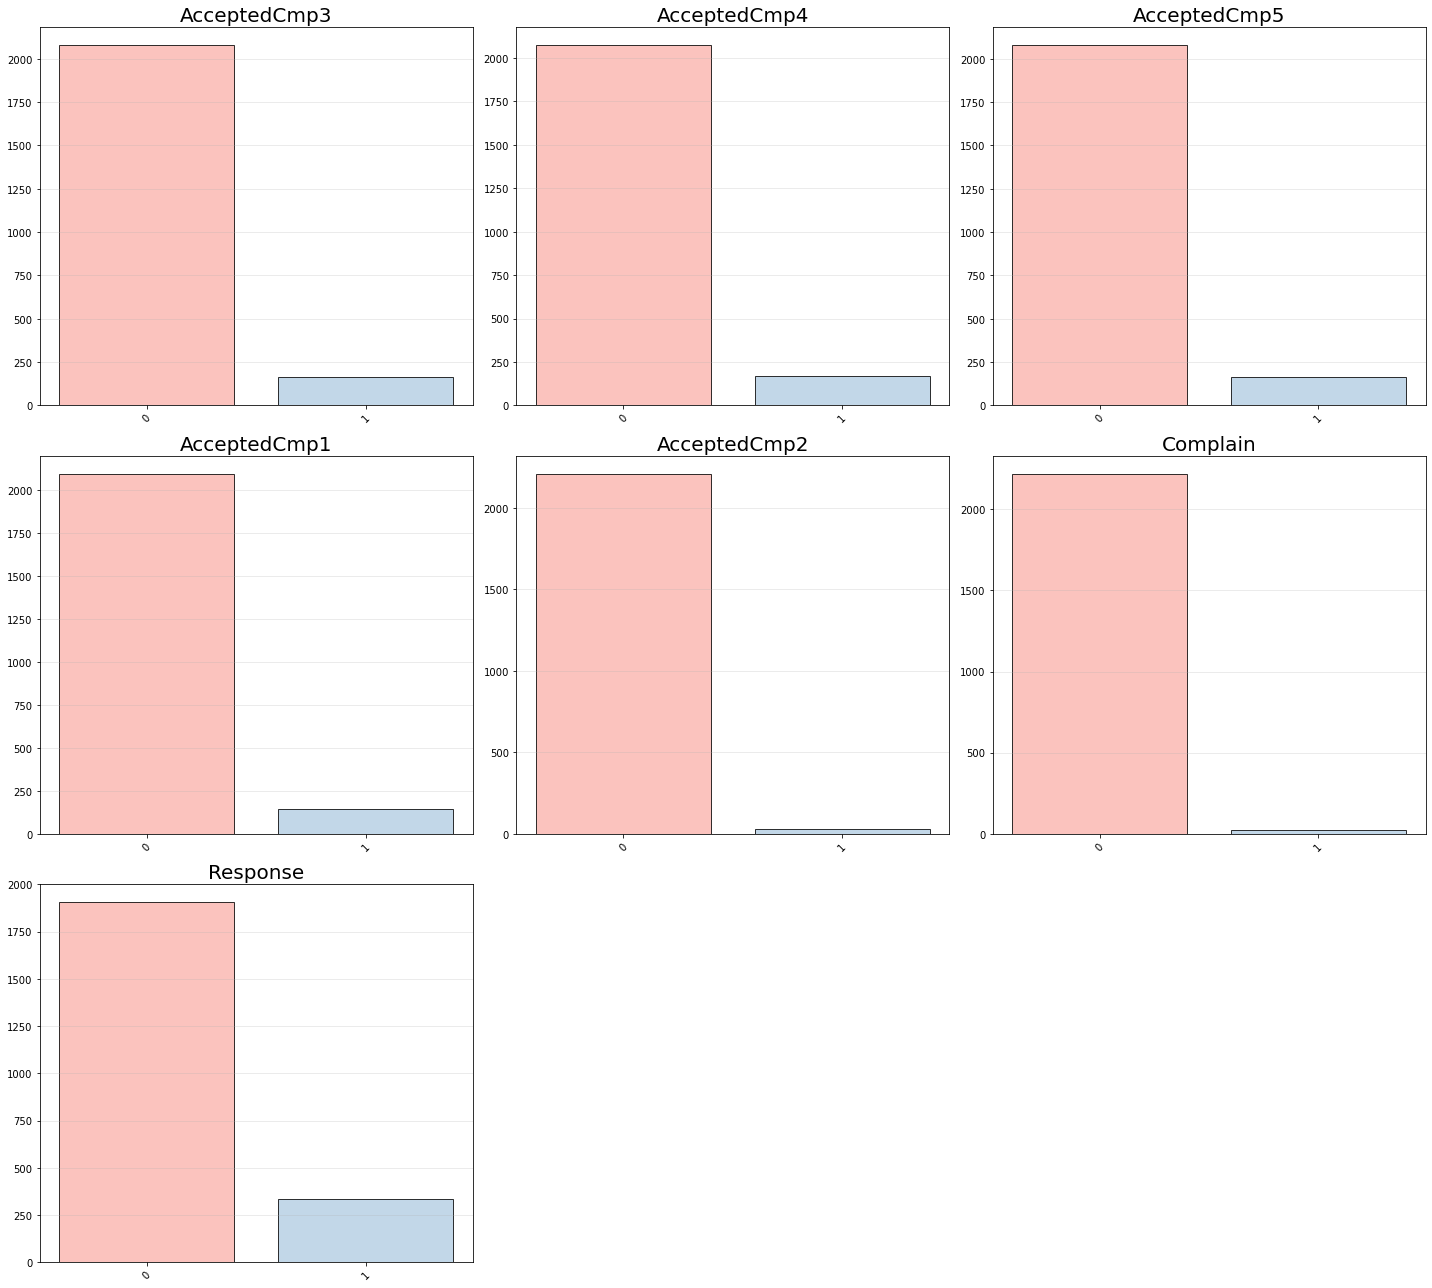

In [75]:
plot_categorical_distributions(data, boolean_features)

- As you can see most of the customers have not accepted the offers of the multiple campaigns, that's when the customer segmentation can help a lot, identify customers with similar characteristics to improve the response rate of this campaigns.
- Also, it's great that only a few have complains in the last 2 years, but, obviusly the business wants to reduce this.

##### Correlation matrix
It would be great to see the correlation between numerical features

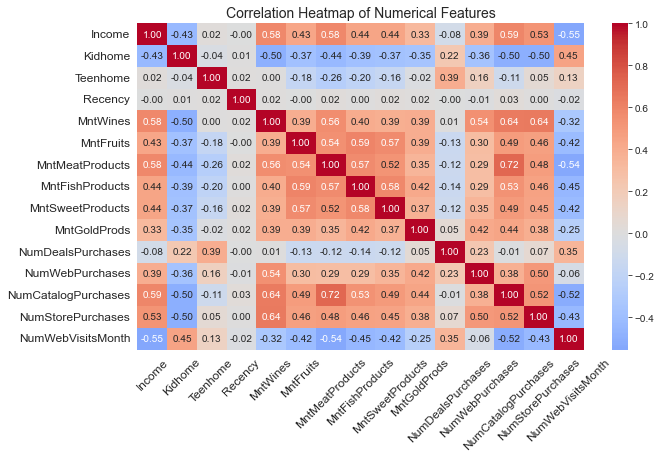

In [80]:
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(10, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
# Set font size for x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)
# Set font size for y-axis tick labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0) # Adjust rotation as needed
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

- Super interesting that the income has high correlation with the number of purchases of different products, that means that as your income increases, the purchases too.
- Also, the number of children have a negative impact in the number of purchases, I'll plot a pairplot between those variables to understand more this relationship.

In [78]:
import seaborn as sns

In [86]:
def plot_pair_variable_vs_others(df, main_var, other_vars):
    vars_to_plot = [main_var] + other_vars
    sns.pairplot(df[vars_to_plot], x_vars=other_vars, y_vars=[main_var], kind='scatter')
    plt.show()

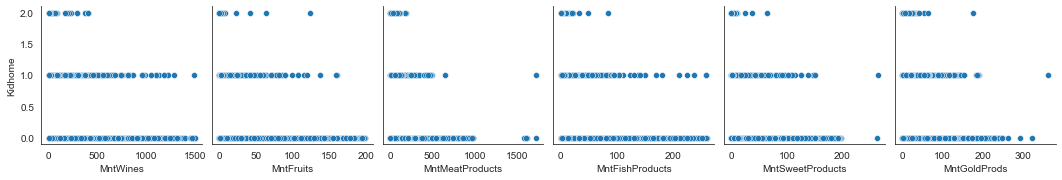

In [92]:
plot_pair_variable_vs_others(data, 'Kidhome', ['MntWines', 'MntFruits', 'MntMeatProducts', 
                                               'MntFishProducts', 'MntSweetProducts',
                                               'MntGoldProds'])

It's clear that having more kids means less capacity to buy this type of products, even for the Sweet products, as one expect the opossite, having more kids increase the sweets purchases.

##### VIF 
Now, I'll calculate VIF in order to see multicoliearity.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For the moment lets fill null values in income with 0's, but in preprocessing step
# we'll be more precise with how we treat this nulls
X_vif = data[numerical_features].fillna(0)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

In [98]:
vif_data.sort_values('VIF', ascending=False)

,feature,VIF
13,NumStorePurchases,8.189310
0,Income,8.158082
14,NumWebVisitsMonth,6.241406
11,NumWebPurchases,6.029741
12,NumCatalogPurchases,5.282631
4,MntWines,4.522404
6,MntMeatProducts,4.368734
10,NumDealsPurchases,3.878113
3,Recency,3.522696
7,MntFishProducts,3.055775


As we don't find a variable with VIF greater than 10, I'll keep all the numerical features, also, they any variable have a correlation greater than 0.8.

# Preprocessing
In this part I'll do the following:
- Handle null values in income
- Solve the part of outliers in some features
- Convert categorical features into numerical
- Scale the data for the modeling part

##### Impute null values
I'll impute the income null values with the mean

In [153]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

##### Outliers
In this I'll use a winzorizer, which basically analyze the feature distribution and cuts based on many methods, in this case I'll use IQR. Let's see how it works.

In [154]:
from feature_engine.outliers import Winsorizer

In [155]:
winsorizer = Winsorizer(
    capping_method='iqr',
    tail='both', # Limith both features extremes
    fold=1.5,
    variables=numerical_features
)

Here is the data distribution before aplying the winzorizer

In [156]:
data[numerical_features].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [157]:
# Apply the winzorizer
data = winsorizer.fit_transform(data)

After the winzorizer

In [158]:
data[numerical_features].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51875.150461,0.444196,0.506250,49.109375,302.112946,21.679018,150.873214,32.115848,21.937946,39.487723,2.215625,4.060714,2.624107,5.790179,5.299107
std,20936.079938,0.538398,0.544538,28.962453,331.057356,27.257348,178.816658,40.361485,27.540334,39.927508,1.538671,2.647333,2.734777,3.250958,2.348357
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,117416.250000,2.000000,2.000000,99.000000,1225.000000,81.000000,556.000000,120.500000,81.000000,126.500000,6.000000,12.000000,10.000000,13.000000,13.000000


##### Categorical features
There are multiple ways of transforming categorical into numerical features. This time I'll use CountFrequencyEncoder, which basically assigns the category the number associated to his frequecy or count. Let's see how it works.

In [159]:
from feature_engine.encoding import CountFrequencyEncoder

In [160]:
data['Education'].value_counts() / data.shape[0]

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [161]:
# Define the encoder
count_frequency_encoder = CountFrequencyEncoder(
    encoding_method='frequency', variables=categorical_features)

In [162]:
# Apply the encoder
data = count_frequency_encoder.fit_transform(data)

In [163]:
data['Education'].value_counts()

0.503125    1127
0.216964     486
0.165179     370
0.090625     203
0.024107      54
Name: Education, dtype: int64

Now, as you can see each category was replaced by his frequency. The adventage of this method is to not create a dummy variable for each class like OneHotEncoder does.

##### Standard Scaler
Finally I'll apply a standar scaler only to numerical features, not at boolean and categorical because even that they are now numerical, applying standar scaler would make loose interpretability for them.

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()

data_scaled_numerical = scaler.fit_transform(data[numerical_features])

In [166]:
data_scaled = data.copy()

In [167]:
data_scaled[numerical_features] = data_scaled_numerical

# Modeling
Now, I'll try two clustering algorithms to find the best customer segmentation. K means and agglomerative clustering.

I'll use the silhouette score to asses the result of the clustering method.
- The Silhouette Score measures how well each point fits into its assigned cluster compared to other clusters.
- For each point:
    - a = the average distance to all other points in the same cluster

    - b = the average distance to points in the closest other cluster (the nearest “alternative” cluster)

        - Then the silhouette for that point is: (b - a) / max(a, b)

- The final slhouette score is the average for all points.
- Higher silhouette score means better separation.


##### K means
First, I'll use 3 as inital number of clusters, in the next section I'll do hyperàrameter tuning to find the best number of clusters

In [169]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [172]:
X = data_scaled[numerical_features + categorical_features + boolean_features]

In [176]:
kmeans = KMeans(n_clusters=3, random_state=102)

In [203]:
labels_k_means = kmeans.fit_predict(X)
score_k_means = silhouette_score(X, labels_k_means)

/Users/salvadorbarcenas/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [215]:
print('Silhouette score with K means and 3 clusters:')
print(np.round(score_k_means, 3))

Silhouette score with K means and 3 clusters:
0.261


To vizualize the clusters I'll use PCA to project the data into a two dimensional space.

In [184]:
from sklearn.decomposition import PCA

In [200]:
def plot_clusters_in_two_space(X, labels, title=''):
    num_clusters = len(np.unique(labels))
    pca = PCA(n_components=2)
    X_plot = pca.fit_transform(X)
    plt.figure(figsize=(10,6))
    for cluster in range(num_clusters):
        plt.scatter(
            X_plot[labels == cluster, 0],
            X_plot[labels == cluster, 1],
            label=f'Cluster {cluster}'
        )
    plt.xlabel("Principal component 1")
    plt.ylabel("Principal component 2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

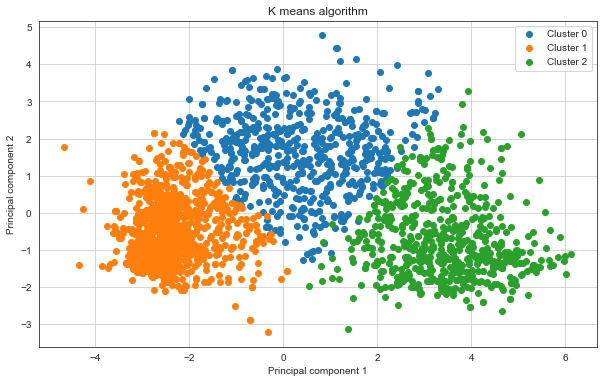

In [202]:
plot_clusters_in_two_space(X, labels_k_means, title='K means algorithm')

##### Agglomerative clustering

In [205]:
from sklearn.cluster import AgglomerativeClustering

In [206]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg_clustering.fit_predict(X)

In [207]:
score_agg = silhouette_score(X, labels_agg)

In [214]:
print('Silhouette score with agglomerative clustering and 3 clusters:')
print(np.round(score_agg, 3))

Silhouette score with agglomerative clustering and 3 clusters:
0.245


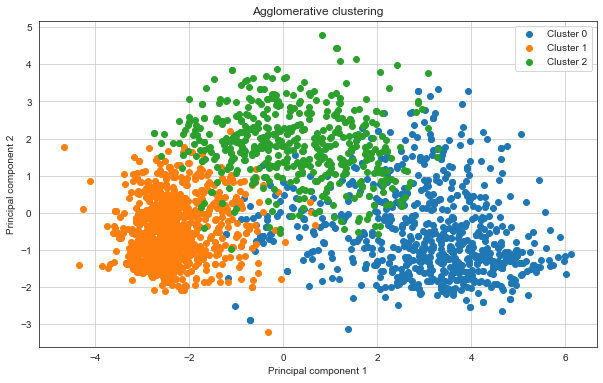

In [209]:
plot_clusters_in_two_space(X, labels_agg, title='Agglomerative clustering')

##### Comparation
It's clear that the k means have a better performance compared to agglomerative clustering with 3 clusters, but in order to see that comparison in detail, I need to do hyperparameter tuning to see which performs better.

# Hyperparameter tuning

##### K means

In [216]:
# Hyperparameters to try
k_values = range(2, 11)
inits = ['k-means++', 'random']

In [225]:
# To save the best silhouette score and the best hyperparameters
best_score = -1
best_params = {}

In [226]:
sil_scores = []
inertias = []
# Try all the combinations
for k in k_values:
    for init_method in inits:
        kmeans = KMeans(
            n_clusters=k, init=init_method, n_init=10, random_state=102)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        sil_scores.append((k, init_method, score))
        inertias.append((k, init_method, kmeans.inertia_))
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': k, 'init': init_method}
            print(f'Best score: {best_score:.4f}')
            print('Best params:', best_params)

Best score: 0.3350
Best params: {'n_clusters': 2, 'init': 'k-means++'}


In [227]:
print("Best Silhouette Score:", best_score)
print("Best hyperparameters:", best_params)

Best Silhouette Score: 0.33497366469685136
Best hyperparameters: {'n_clusters': 2, 'init': 'k-means++'}


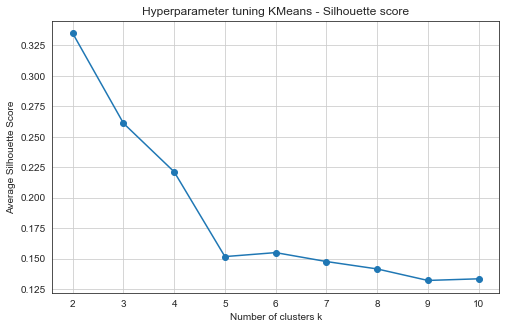

In [230]:
avg_scores_per_k = []
for k in k_values:
    scores = [s[2] for s in sil_scores if s[0] == k]
    avg_scores_per_k.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(k_values, avg_scores_per_k, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Average Silhouette Score")
plt.title("Hyperparameter tuning KMeans - Silhouette score")
plt.grid(True)
plt.show()

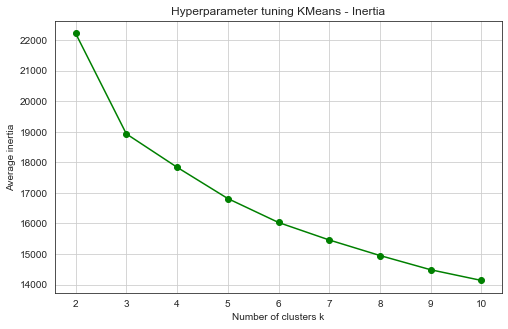

In [231]:
avg_inertia_per_k = []
for k in k_values:
    scores = [s[2] for s in inertias if s[0] == k]
    avg_inertia_per_k.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(k_values, avg_inertia_per_k, marker='o', color='green')
plt.xlabel("Number of clusters k")
plt.ylabel("Average inertia")
plt.title("Hyperparameter tuning KMeans - Inertia")
plt.grid(True)
plt.show()

Based on the silhouette score the best hyperparameters are:
- 2 clusters and init k means ++


However, based on the elbow method it's not clear which n cluster is the best, as there isn't a clear inflection point. Maybe we can use 4 because after 5 the silhouette score drops drastically.

##### Agglomerative clustering

In [237]:
# Hyperparameters
k_values = range(2, 11)
linkages = ['ward', 'complete', 'average', 'single']
affinity_options = {
    'ward': ['euclidean'], # Ward only works with euclidean distance
    'complete': ['euclidean', 'manhattan', 'cosine'],
    'average': ['euclidean', 'manhattan', 'cosine'],
    'single': ['euclidean', 'manhattan', 'cosine']
}

In [242]:
best_score = -1
best_params = {}
sil_scores = []

In [243]:
# Try hyperparameters
for k in k_values:
    for linkage in linkages:
        for affinity in affinity_options[linkage]:
            agg = AgglomerativeClustering(n_clusters=k, linkage=linkage, metric=affinity)
            labels = agg.fit_predict(X)
            score = silhouette_score(X, labels)
            sil_scores.append((k, linkage, affinity, score))
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': k, 'linkage': linkage, 'affinity': affinity}
                print(f'Best score: {best_score:.4f}')
                print('Best params:', best_params)

Best score: 0.2723
Best params: {'n_clusters': 2, 'linkage': 'ward', 'affinity': 'euclidean'}
Best score: 0.3239
Best params: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'euclidean'}


In [244]:
print("Best Silhouette Score:", best_score)
print("Best hyperparameters:", best_params)

Best Silhouette Score: 0.3238715423490471
Best hyperparameters: {'n_clusters': 2, 'linkage': 'complete', 'affinity': 'euclidean'}


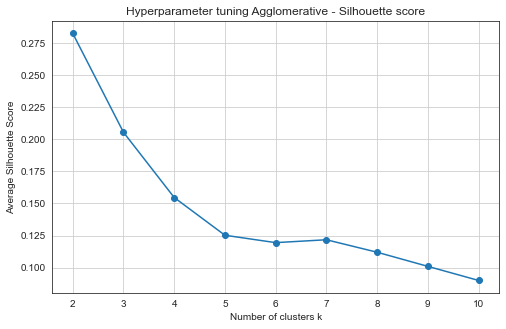

In [248]:
avg_scores_per_k = []
for k in k_values:
    scores = [s[3] for s in sil_scores if s[0] == k]
    avg_scores_per_k.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(k_values, avg_scores_per_k, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Average Silhouette Score")
plt.title("Hyperparameter tuning Agglomerative - Silhouette score")
plt.grid(True)
plt.show()

Based on the silhouette score the best hyperparameters are:
- 2 clusters, affinity linkage and euclidean distance

But, the k means obtained a higher silhouette score.
- Best silhouette score k means: 0.3350
- Best silhouette score agglomerative: 0.3239

Based on this I'll choose the k means algorithm and 4 clusters because:
- Event is not the best, it has a decent silhouette score, is the best before it drops drastically.
- It helps the business to target in a detailed way rather than only 2 clusters.

In the conclusions I'll explain why K means performed better than agglomerative clustering in this problem.

# Cluster analysis
Finally, I'll train the final clustering k means using 4 clusters and see each cluster description.

In [249]:
kmeans = KMeans(n_clusters=4, random_state=102)

labels_k_means = kmeans.fit_predict(X)
score_k_means = silhouette_score(X, labels_k_means)

/Users/salvadorbarcenas/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


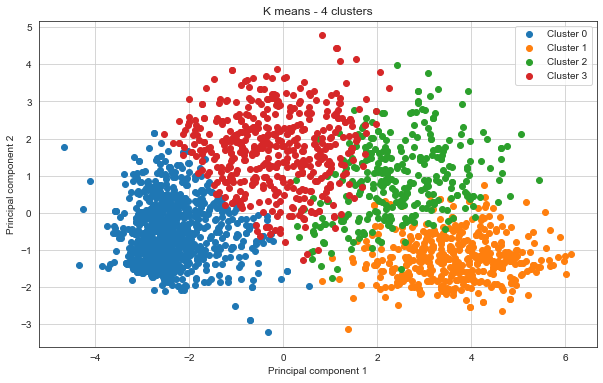

In [250]:
plot_clusters_in_two_space(X, labels_k_means, title='K means - 4 clusters')

I'll import the original data before feature trasformation for a better clusters description.

In [253]:
data = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [254]:
data['Cluster'] = labels_k_means

In [259]:
data.groupby('Cluster')[numerical_features].mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,,,,,
0,34561.196687,0.803681,0.417178,49.137014,34.440695,4.666667,24.041922,6.752556,4.655419,14.237219,1.946830,1.976483,0.506135,3.096115,6.474438
1,78235.635165,0.024017,0.034934,50.050218,633.432314,66.517467,501.943231,98.019651,66.982533,74.792576,1.032751,4.639738,6.251092,8.209607,2.373362
2,64553.981191,0.142857,0.754658,48.854037,491.003106,58.854037,227.630435,79.403727,62.869565,77.993789,2.798137,6.953416,4.329193,9.009317,4.822981
3,55050.123950,0.315353,0.968880,48.329876,412.692946,10.242739,98.066390,14.506224,10.676349,52.522822,4.004149,5.919087,2.512448,6.807054,6.093361


Let's describe each cluster:
- Cluster 0: Lower-income, largest number of children, conservative shoppers with low spending overall. Note that this cluster has the highest visits to website in the last month.
- Cluster 1: Wealthy, childless, big spenders across all categories.
- Cluster 2: Families with teens, frequent buyers, especially of gold.
- Cluster 3: Middle-income families with teens, moderate and balanced shoppers.

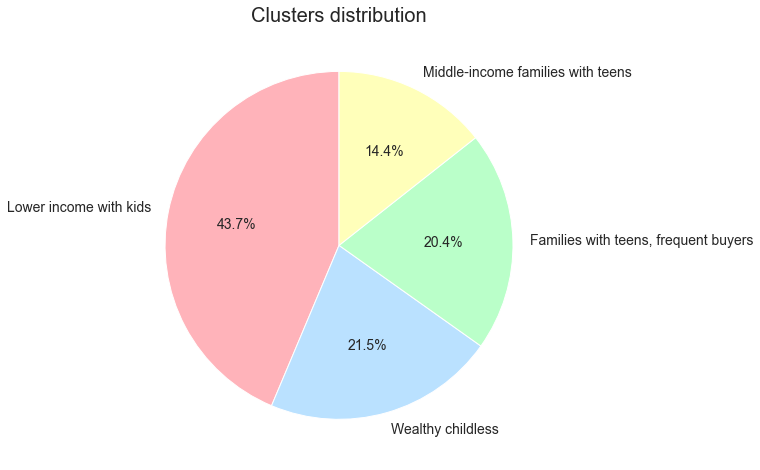

In [271]:
sizes = data['Cluster'].value_counts().values
labels = [
    'Lower income with kids', 'Wealthy childless', 'Families with teens, frequent buyers',
    'Middle-income families with teens']
colors = ['#ffb3ba', '#bae1ff', '#baffc9', '#ffffba']

plt.figure(figsize=(10,8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 14}
)
plt.title("Clusters distribution", fontsize=20)
plt.show()

Now, analyze their marital status and education.

In [281]:
def plot_categories_by_cluster(variable):
    # Cout frequency by cluster
    counts = pd.crosstab(data['Cluster'], data[variable])
    counts_pct = counts.div(counts.sum(axis=1), axis=0)
    # Plot stacked bar
    fig, ax = plt.subplots(figsize=(8,6))
    counts_pct.plot(kind='bar', stacked=True, colormap='Pastel1', ax=ax)

    # Add proportions to each bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.text(x + width/2, y + height/2, f"{height*100:.1f}%", ha='center', va='center', fontsize=10)

    plt.ylabel('Proportion')
    plt.title(f'Proportion of {variable} by Cluster')
    ax.legend(title=variable, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

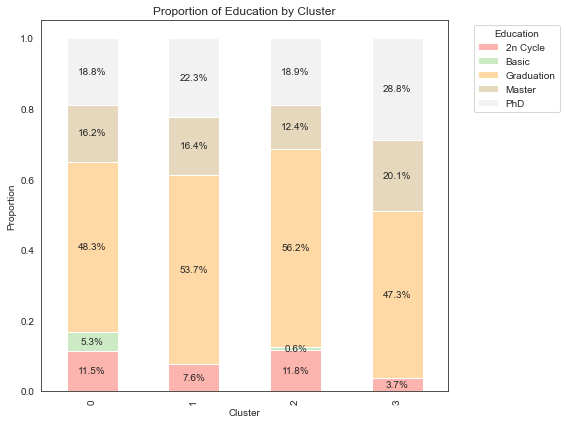

In [282]:
plot_categories_by_cluster('Education')

- The cluster 0 has more people with basic education
- The cluster 3 is the most educated set of customers as they have more PhD's and the smallest number of people with basic education
- Overall there isn't much difference between clusters

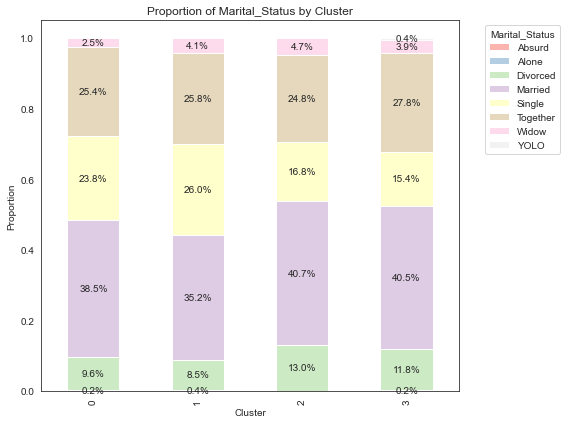

In [284]:
plot_categories_by_cluster('Marital_Status')

- This variable has less difference between clusters, except the 3 with higher divorces and higher married customers.

# Conclusions

- K means perfomed a little bit better in this dataset, because K means assumes spherical, similar sized clusters, which fits better this data while agglomerative clustering can handle arbitrary shapes, but may not optimize internal variance as effectively as k means.
- I found 2 as the best number of clusters in terms of silhouette score, however as this is a business problem I decided to use 4 as is the optimal before the silhouette score drops drastically.
- Now, we can describe stakeholders the clusters and how thet can improve their campaigns to have higher responses rates because now they have low responses rates.
- The cluster 0, lower income with kids is the most common cluster, has low spending but high engagement with the company web page, that means the business can offer them campaigns through there, for example.
- The cluster of wealthy childless can be targeted with special products to take advantage of their high spending and improve profitability.

# Next steps
- Try different methods for converting categorical features into numerical.
- Explore different clustering algotithms like DBSCAN.
- Try to quit some features that don't have much difference between clusters to quit noise.
- Make some new features.